In [1]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

2024-08-08 21:38:46.085887: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
MLP_distances_all_data = []

/home/ni/Downloads/Geant4 Data/output_nt_Hits_1mm.csv


2024-08-08 21:38:47.189547: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-08 21:38:47.193076: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-08-08 21:38:47.200303: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-08-08 21:38:47.200318: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ni-MS-7D75
2024-08-08 21:38:47.200322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ni-MS-7D75
2024-08-08 21:38:47.200443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.183.6
2024-08-08 21:38:47.200457: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: Not found: could not fi

Average MLP Distance (mm): -0.04149366638530244
Median MLP Distance (mm): -0.035753178596496765


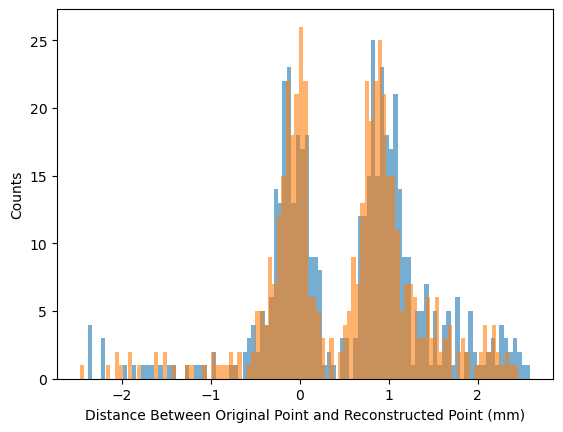

/home/ni/Downloads/Geant4 Data/output_nt_Hits_2mm.csv
Average MLP Distance (mm): 0.057754504537829314
Median MLP Distance (mm): 0.06470603942871067


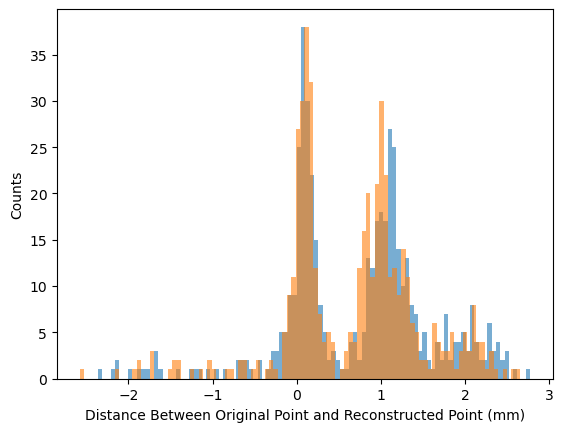

/home/ni/Downloads/Geant4 Data/output_nt_Hits_3mm.csv
Average MLP Distance (mm): -0.008008366851308886
Median MLP Distance (mm): 0.00610599517822337


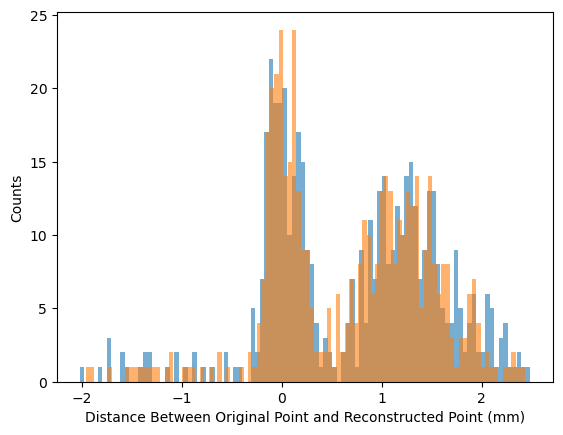

/home/ni/Downloads/Geant4 Data/output_nt_Hits_4mm.csv
Average MLP Distance (mm): 0.024570775023767557
Median MLP Distance (mm): 0.030129814147948526


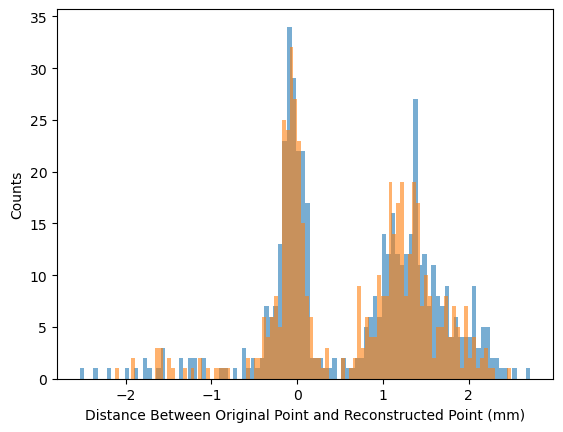

/home/ni/Downloads/Geant4 Data/output_nt_Hits_5mm.csv
Average MLP Distance (mm): -0.012514778049057604
Median MLP Distance (mm): -0.007110691070556019


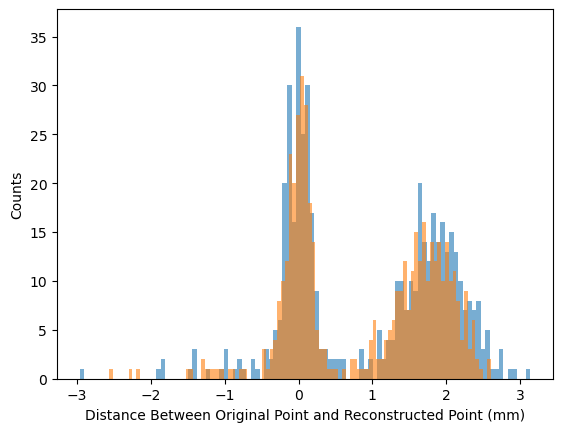

/home/ni/Downloads/Geant4 Data/output_nt_Hits_6mm.csv
Average MLP Distance (mm): 0.022164692263135933
Median MLP Distance (mm): 0.0192738056182856


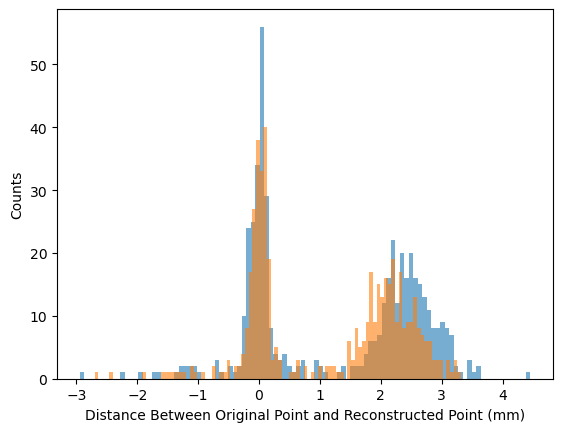

/home/ni/Downloads/Geant4 Data/output_nt_Hits_7mm.csv
Average MLP Distance (mm): -0.005563472000621918
Median MLP Distance (mm): 0.0018604904413220616


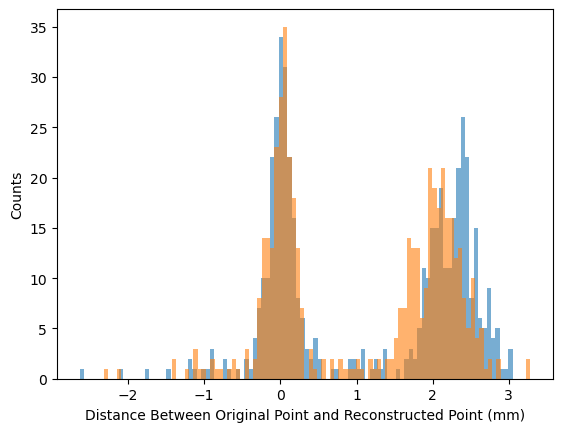

/home/ni/Downloads/Geant4 Data/output_nt_Hits_8mm.csv
Average MLP Distance (mm): -0.0051840026694975165
Median MLP Distance (mm): -0.004610812664031939


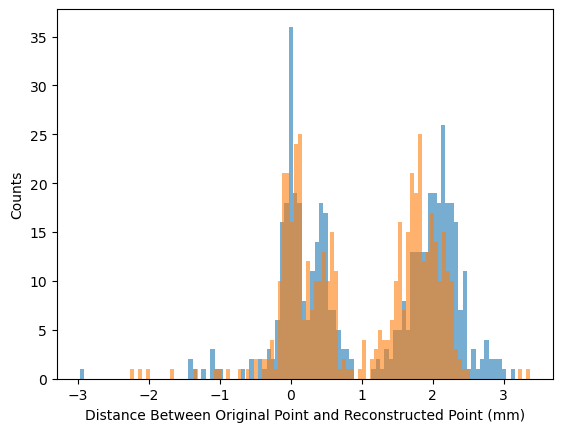

/home/ni/Downloads/Geant4 Data/output_nt_Hits_9mm.csv
Average MLP Distance (mm): 0.0251725419252272
Median MLP Distance (mm): 0.013991534709930146


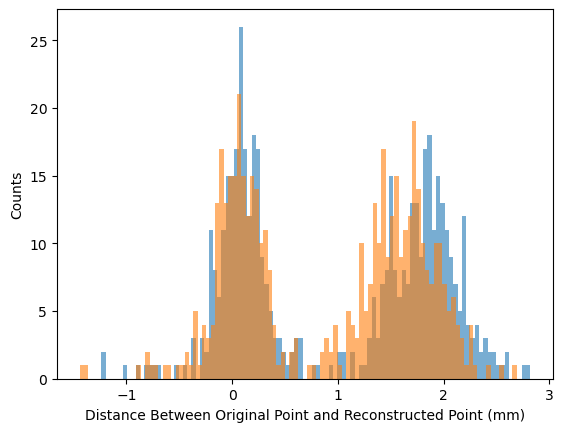

/home/ni/Downloads/Geant4 Data/output_nt_Hits_10mm.csv
Average MLP Distance (mm): -0.01765734029019263
Median MLP Distance (mm): 0.004141247272492124


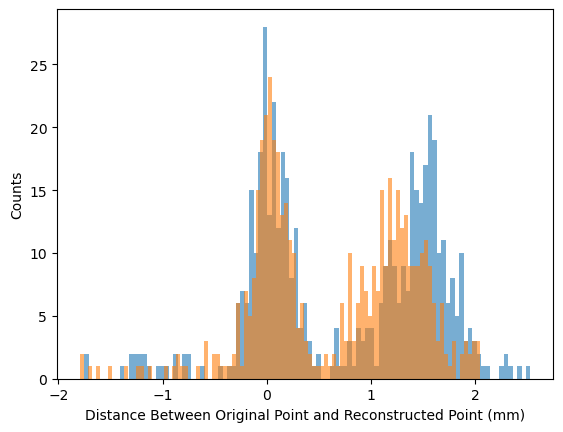

/home/ni/Downloads/Geant4 Data/output_nt_Hits_11mm.csv
Average MLP Distance (mm): -0.04268979046124013
Median MLP Distance (mm): -0.04986622333526567


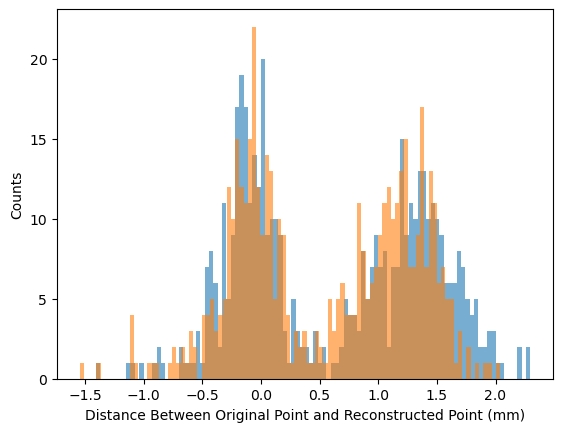

/home/ni/Downloads/Geant4 Data/output_nt_Hits_12mm.csv
Average MLP Distance (mm): -0.020075895873547085
Median MLP Distance (mm): -0.020614820718766302


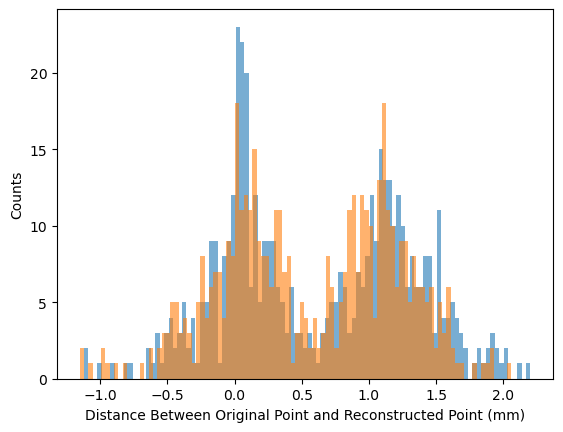

/home/ni/Downloads/Geant4 Data/output_nt_Hits_13mm.csv
Average MLP Distance (mm): 0.0344345693482938
Median MLP Distance (mm): 0.03660218715667778


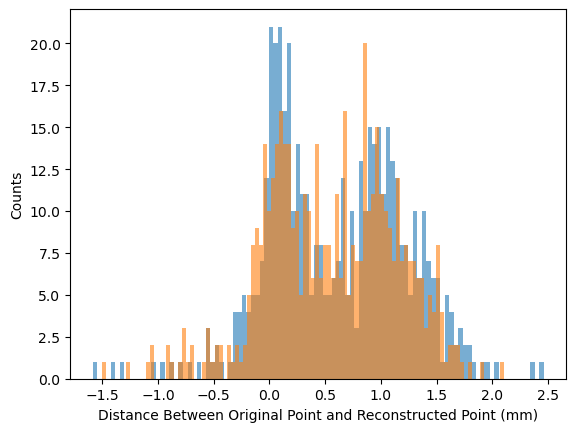

/home/ni/Downloads/Geant4 Data/output_nt_Hits_14mm.csv
Average MLP Distance (mm): 0.027097170681973197
Median MLP Distance (mm): 0.04443540573120153


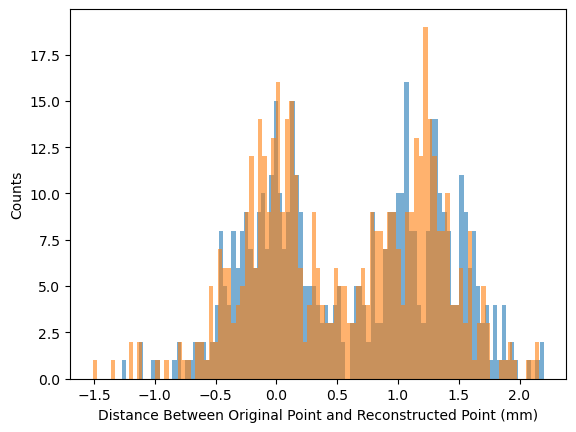

/home/ni/Downloads/Geant4 Data/output_nt_Hits_15mm.csv
Average MLP Distance (mm): 0.004043271484350427
Median MLP Distance (mm): -0.00691680908202983


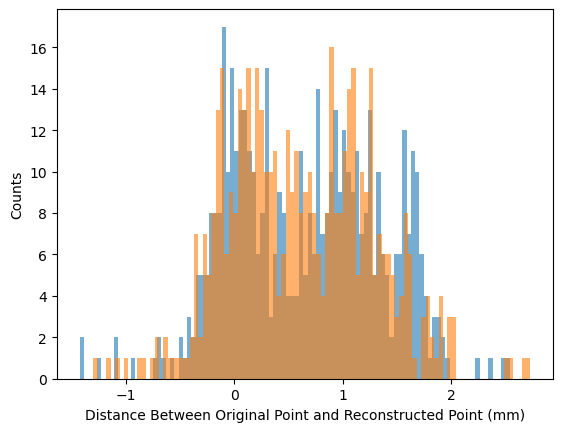

In [3]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for q in numbers:
    #getting X data
    #file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
    file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    print('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    csvreader = csv.reader(file)
    #first 13 rows aren't needed
    line_count = 0;
    original_X = []
    for row in csvreader:
      if line_count >= 13:
        original_X.append([int(i) for i in row])
      line_count += 1
    
    
    #getting Y data
    original_y = []
    for i in range(-122, 1):
      for j in range(-122, 1):
        original_y.append([i*0.2, j*0.2])
    
    #reconstructing
    num_X = np.array(original_X).reshape(123,123,9)
    num_y = np.array(original_y).reshape(123,123,2)
    bottom_right_X = []
    bottom_right_y = []
    for i in range(-122, 0):
      for j in range(-122, 1):
        tmp_X = copy.deepcopy(num_X[i+122][j+122])
        tmp_y = copy.deepcopy(num_y[i+122][j+122])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        bottom_right_X.append(tmp_X)
        bottom_right_y.append(tmp_y)
    
    bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
    bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)
    
    top_left_X = []
    top_left_y = []
    for i in range(-122, 1):
      for j in range(-122, 0):
        tmp_X = copy.deepcopy(num_X[i+122][j+122])
        tmp_y = copy.deepcopy(num_y[i+122][j+122])
        #mirroring
        tmp_y[1] = -tmp_y[1]
        for k in range(3):
          tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
        top_left_X.append(tmp_X)
        top_left_y.append(tmp_y)
    
    top_left_X = np.array(top_left_X).reshape(123,122,9)
    top_left_y = np.array(top_left_y).reshape(123,122,2)
    
    top_right_X = []
    top_right_y = []
    for i in range(-122, 0):
      for j in range(-122, 0):
        tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
        tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        top_right_X.append(tmp_X)
        top_right_y.append(tmp_y)
    
    top_right_X = np.array(top_right_X).reshape(122,122,9)
    top_right_y = np.array(top_right_y).reshape(122,122,2)
    
    #converting to numpy array
    X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
    y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

    #training
    MLP_distances = np.zeros((245,245,2))
    scaler = StandardScaler()
    for k in range(10):
        X_MLP = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_MLP, y, test_size=0.3)
    
        model = Sequential()
        model.add(Dense(128, input_dim=9, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(2, activation='linear'))
    
        model.compile(optimizer='adam', loss='mean_squared_error')
     
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
        #finding distances
        yhat = model.predict(X_MLP)
        for i in range(len(X)):
            #finding average of each point
            MLP_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)][0] = k / (k + 1) * MLP_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)][0] + 1 / (k + 1) * (yhat[i][0] - y[i][0])
            MLP_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)][1] = k / (k + 1) * MLP_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)][1] + 1 / (k + 1) * (yhat[i][1] - y[i][1])
    
    print("Average MLP Distance (mm): " + str(np.average(MLP_distances)))
    print("Median MLP Distance (mm): " + str(np.median(MLP_distances)))

    plt.hist(MLP_distances[:][:][0].ravel(), bins=100, alpha=0.6, label='delta X')
    plt.hist(MLP_distances[:][:][1].ravel(), bins=100, alpha=0.6, label='delta Y')
    plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
    plt.ylabel('Counts')
    plt.show()

    MLP_distances_all_data.append(MLP_distances)

In [4]:
MLP_distances_all_data_np = np.array(MLP_distances_all_data)
np.savetxt('MLP_distances_delta.csv', MLP_distances_all_data_np.reshape(MLP_distances_all_data_np.shape[0], -1))

#print(MLP_distances_all_data_np.shape)